In [1]:
import numpy as np 
import pandas as pd 


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [4]:


encoder = OneHotEncoder()     
encoder.fit([[0],[1]])   



OneHotEncoder()

In [5]:


OneHotEncoder()



OneHotEncoder()

In [6]:
input_path = []
label = []

In [7]:
data = []
paths = []
result = []
for r,d,f in os.walk(r"/content/drive/MyDrive/brain tumor detection/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(0)
        input_path.append(os.path.join("Tumor","Tumor",path))
        result.append(encoder.transform([[0]]).toarray())

In [8]:


paths = []
for r,d,f in os.walk(r"/content/drive/MyDrive/brain tumor detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(1)
        input_path.append(os.path.join("No Tumor","No Tumor",path))
        result.append(encoder.transform([[1]]).toarray())



In [9]:
len(input_path)

139

In [10]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/content/drive/MyDrive/brain tumor detection/n...,1
1,/content/drive/MyDrive/brain tumor detection/n...,1
2,/content/drive/MyDrive/brain tumor detection/n...,1
3,/content/drive/MyDrive/brain tumor detection/n...,1
4,/content/drive/MyDrive/brain tumor detection/n...,1


In [11]:
pd.unique(df['label'])

array([1, 0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


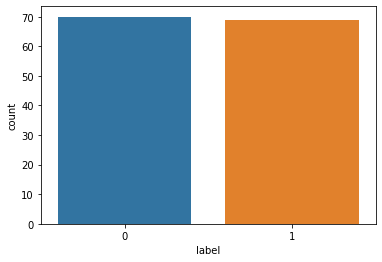

In [12]:
import seaborn as sns
sns.countplot(df['label'])

In [13]:


print(np.array(result))



[[[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0

In [14]:


result = np.array(result)
result = result.reshape(139,2)



In [15]:


result.shape



(139, 2)

In [16]:
data = np.array(data)
#data = data.reshape(139, 128, 128, 3)
data.shape

(139, 224, 224, 3)

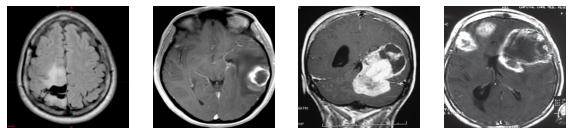

In [17]:
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()

In [18]:


x_train , x_test , y_train , y_test = train_test_split(data , result , test_size = 0.25 , shuffle = True , random_state = 1)



In [19]:
print("Shape of an image in x_train : ",x_train[0].shape)
print("Shape of an image in x_test : ",x_test[0].shape)

Shape of an image in x_train :  (224, 224, 3)
Shape of an image in x_test :  (224, 224, 3)


In [20]:


x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [21]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (104, 224, 224, 3)
x_test Shape :  (35, 224, 224, 3)
y_train Shape:  (104, 2)
y_test Shape:  (35, 2)


In [22]:
modelVGG = VGG16(include_top = False,weights = 'imagenet',classifier_activation = 'softmax',input_shape = (224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [23]:
for layer in modelVGG.layers:
    layer.trainable = False

In [24]:
num_classes = 2
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(2,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [25]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [26]:
num_classes = 2
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [27]:


print(model.summary())



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(x_train , y_train , epochs = 15 , validation_data = (x_test , y_test), verbose = 1 , initial_epoch = 0)

Epoch 1/15
4/4 [==============================] - 79s 20s/step - loss: 10.3387 - accuracy: 0.5000 - val_loss: 3.4216 - val_accuracy: 0.3714
Epoch 2/15
4/4 [==============================] - 72s 18s/step - loss: 1.6335 - accuracy: 0.5192 - val_loss: 0.3524 - val_accuracy: 0.8571
Epoch 3/15
4/4 [==============================] - 72s 18s/step - loss: 0.4290 - accuracy: 0.7885 - val_loss: 0.2542 - val_accuracy: 0.9714
Epoch 4/15
4/4 [==============================] - 74s 19s/step - loss: 0.3115 - accuracy: 0.8846 - val_loss: 0.4309 - val_accuracy: 0.7143
Epoch 5/15
4/4 [==============================] - 72s 18s/step - loss: 0.1770 - accuracy: 0.9423 - val_loss: 0.3558 - val_accuracy: 0.8571
Epoch 6/15
4/4 [==============================] - 72s 18s/step - loss: 0.0827 - accuracy: 0.9808 - val_loss: 0.3086 - val_accuracy: 0.8857
Epoch 7/15
4/4 [==============================] - 74s 19s/step - loss: 0.0503 - accuracy: 1.0000 - val_loss: 0.7320 - val_accuracy: 0.7429
Epoch 8/15
4/4 [==========

In [29]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

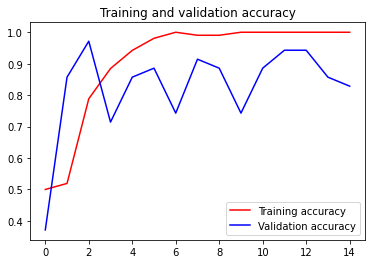

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [31]:


def names(number):
    if number==0:
        return "It's a TUMOR"
    else:
        return "It's NOT a Tumor"



In [32]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

98.30971956253052% Confidence It's a TUMOR


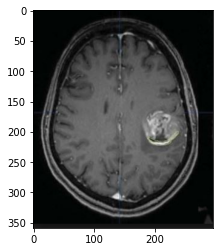

In [33]:
img = Image.open(r"/content/drive/MyDrive/brain tumor detection/yes/Y19.JPG")
Prediction(img)

99.99994039535522% Confidence It's NOT a Tumor


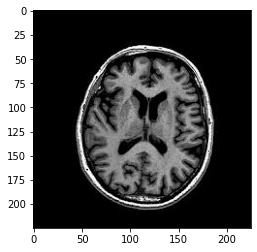

In [34]:
img = Image.open(r"/content/drive/MyDrive/brain tumor detection/no/37 no.jpg")
Prediction(img)

99.99933242797852% Confidence It's NOT a Tumor


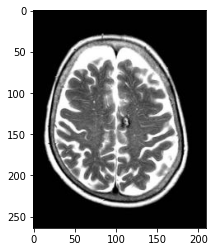

In [35]:
img = Image.open(r"/content/drive/MyDrive/brain tumor detection/no/N26.JPG")
Prediction(img)

98.69634509086609% Confidence It's a TUMOR


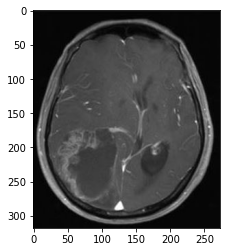

In [36]:


img = Image.open(r"/content/drive/MyDrive/brain tumor detection/yes/Y182.JPG")
Prediction(img)

